# Clean data

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [12]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

In [13]:
# We will import the file from the Exil (spreadsheet).
data = pd.read_csv("Wholesale customers data.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Without Scalling

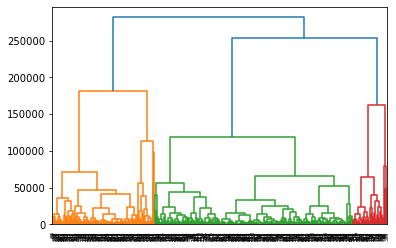

In [14]:
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))

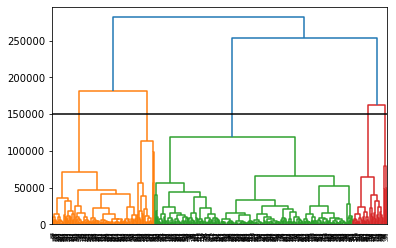

In [17]:
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.axhline(y=150000, c='k')

In [15]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(data)
labels = model.labels_

In [16]:
labels

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 0, 3, 4, 1, 3, 0, 3, 3, 0, 0, 3, 0, 4, 1, 3, 3, 0, 4,
       0, 4, 4, 2, 0, 4, 0, 0, 1, 0, 3, 0, 4, 0, 3, 0, 0, 2, 0, 0, 0, 4,
       0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 4, 0, 0, 0, 0, 0, 3, 0, 2, 2, 1,
       0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0, 4,
       0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 1, 1, 3, 3, 0, 1, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 4, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 4, 0, 3, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 4, 0, 3, 3, 0,
       0, 0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 3, 4, 0, 0, 0, 0, 4, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 1, 3, 3,
       3, 0, 0, 0, 0, 3, 3, 0, 0, 4, 0, 3, 0, 3, 0, 0, 1, 1, 0, 0, 3, 0,
       0, 0, 4, 3, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 1, 3, 1, 1,
       0, 3, 3, 1, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3,

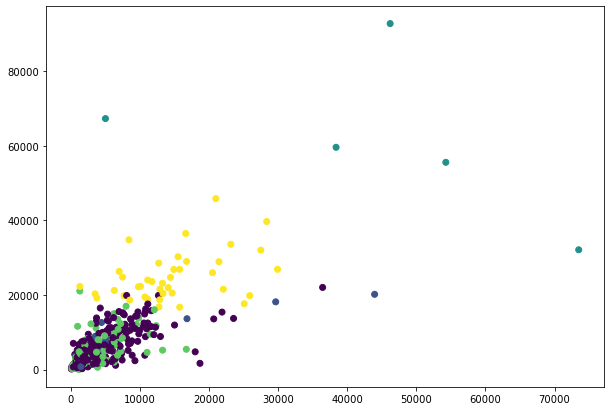

In [20]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['Milk'], data['Grocery'], c=model.labels_) 

# with scalling

In [21]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


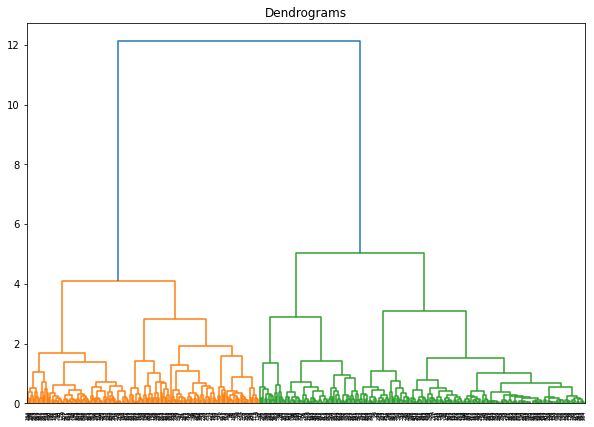

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

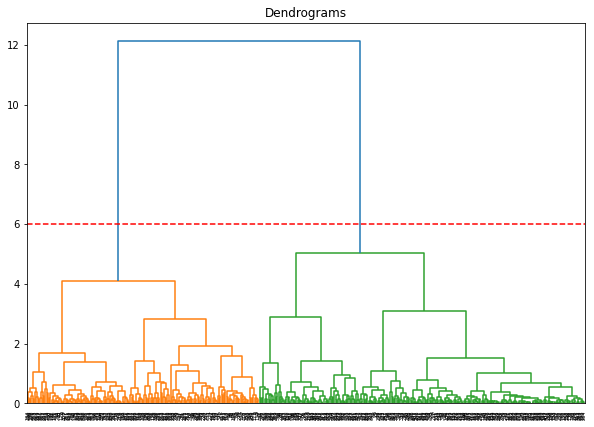

In [24]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

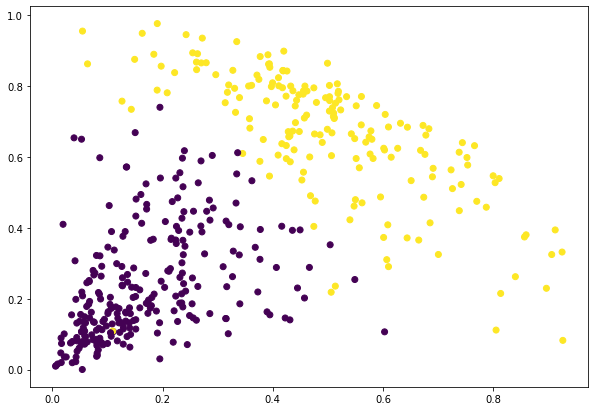

In [26]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)